* Reference: __Analytic solutions for optimal statistical arbitrage trading.__ by _Bertram, W. K._

# OU Model Optimal Trading Thresholds Bertram

## Introduction

This notebook demonstrates an implementation of the methods described in [Bertram, W. K. (2010). Analytic solutions for optimal statistical arbitrage trading.](http://www.stagirit.org/sites/default/files/articles/a_0340_ssrn-id1505073.pdf) for finding optimal trading thresholds.

In this paper, the author derives analytic formulae for statistical arbitrage trading where the price of an asset follows an exponential Ornstein-Uhlenbeck process. By framing the problem in terms of the first-passage time of the process, he first derives the expressions for the mean and the variance of the trade length. Then he derives the formulae for the expected return and the variance of the return per unit of time. Finally, a solution to the problem of choosing optimal trading thresholds is proposed by maximizing the expected return and the Sharpe ratio.

---

## Assumptions

### Price of the Traded Security
The model defines the price of the traded security $p_t$ as,

${p_t = e^{X_t}};\quad{X_{t_0} = x_0}$

where $X_t$ follows an O-U process and satisfies the following stochastic differential equation,

${dX_t = {\mu}({\theta} - X_t)dt + {\sigma}dW_t}$

where
${\theta}$ is the long-term mean, ${\mu}$ is the speed at which the values will regroup around the long-term mean and ${\sigma}$ is the amplitude of randomness of the O-U process.

### Trading Strategy
The trading strategy is defined by entering a trade when $X_t = a$, exiting the trade at $X_t = m$, where $a < m$. The paper here assumes that traders can only make a long trade on the traded security. The original model was adjusted and this assumption was later removed in the work of Zeng, Z. and Lee, C.-G. (2014) to obtain a more versatile trading model.

### Trading Cycle
The trading cycle is completed as $X_t$ change from $a$ to $m$, then back to $a$.

### Trade Length
The trade length $T$ is defined as the time needed to complete a trading cycle.

---

## Analytic Formulae

### Mean and Variance of the Trade Length
$E[T] = \frac{\pi}{\mu} (Erfi(\frac{(m - \theta)\sqrt{\mu}}{\sigma}) - Erfi(\frac{(a - \theta)\sqrt{\mu}}{\sigma}))$,

where $Erfi(x) = iErf(ix)$ is the imaginary error function.

$V[T] = ({w_1(\frac{(m - \theta)\sqrt{2\mu}}{\sigma})} - {w_1(\frac{(a - \theta)\sqrt{2\mu}}{\sigma})} - {w_2(\frac{(m - \theta)\sqrt{2\mu}}{\sigma})} + {w_2(\frac{(a - \theta)\sqrt{2\mu}}{\sigma})}) / {{\mu}^2}$,

where 

$w_1(z) = (\frac{1}{2} \sum_{k=1}^{\infty} \Gamma(\frac{k}{2}) (\sqrt{2}z)^k / k! )^2 - (\frac{1}{2} \sum_{n=1}^{\infty} (-1)^k \Gamma(\frac{k}{2}) (\sqrt{2}z)^k / k! )^2$,

$w_2(z) = \sum_{k=1}^{\infty} \Gamma(\frac{2k - 1}{2}) \Psi(\frac{2k - 1}{2}) (\sqrt{2}z)^{2k - 1} / (2k - 1)!$,

where $\Psi(x) = \psi(x) − \psi(1)$ and $\psi(x)$ is the digamma function.

### Mean and Variance of the Trading Strategy Return per Unit of Time

$\mu_s(a,\ m,\ c) = \frac{r(a,\ m,\ c)}{E [T]}$

$\sigma_s(a,\ m,\ c) = \frac{{r(a,\ m,\ c)}^2{V[T]}}{{E[T]}^3}$

where $r(a,\ m,\ c) = (m − a − c)$ gives the continuously compound rate of return for a single trade accounting for transaction cost.

---

## Optimal Strategies

To calculate an optimal trading strategy, we seek to choose optimal entry and exit thresholds that maximize the expected return or the Sharpe ratio per unit of time for a given transaction cost/risk-free rate.

### Get Optimal Thresholds by Maximizing the Expected Return / Sharpe Ratio

This paper shows that the maximum expected return/Sharpe ratio occurs when $(m - \theta)^2 = (a - \theta)^2$. Since we have assumed that $a < m$, this implies that $m = 2\theta − a$. Therefore, for a given transaction cost/risk-free rate, the following equation can be maximized to find optimal $a$ and $m$.

$\mu^*_s(a, c) = \frac{r(a, 2\theta − a, c)}{E [T]}$

$S^*(a, c, r_f) = \frac{\mu_s(a, 2\theta − a, c) - r^*}{\sigma_s(a, 2\theta − a, c)}$

where $r^* = \frac{r_f}{E[T]}$ and $r_f$ is the risk free rate.

---

## Example Usage of the Module

In [1]:
from arbitragelab.time_series_approach.ou_optimal_threshold_bertram import OUModelOptimalThresholdBertram

In [2]:
# Creating a class instance
OUOTB = OUModelOptimalThresholdBertram()

# Initializing OU-process parameter
OUOTB.construct_ou_model_from_given_parameters(theta = 0, mu = 180.9670, sigma = 0.1538)

In [3]:
%%time
# Getting optimal thresholds by maximizing the expected return
a, m = OUOTB.get_threshold_by_maximize_expected_return(c = 0.001)

# Getting the expected return and the variance
E = OUOTB.expected_return(a = a, m = m, c = 0.001)
V = OUOTB.return_variance(a = a, m = m, c = 0.001)

print("Entering a trade when Xt =", a)
print("Exiting the trade at Xt =", m)
print("Expected Return:", E)
print("Variance:", V)

Entering a trade when Xt = -0.004715176714235135
Exiting the trade at Xt = 0.004715176714235135
Expected Return: 0.49235832791695305
Variance: 0.0021857380535256223
Wall time: 42.5 ms


In [4]:
%%time
# Getting optimal thresholds by maximizing the Sharpe ratio
a, m = OUOTB.get_threshold_by_maximize_sharpe_ratio(c = 0.001, rf = 0.01)

# Getting the Sharpe ratio
S = OUOTB.sharpe_ratio(a = a, m = m, c = 0.001, rf = 0.01)

print("Entering a trade when Xt =", a)
print("Exiting the trade at Xt =", m)
print("Sharpe Ratio:", S)

Entering a trade when Xt = -0.01125468750000001
Exiting the trade at Xt = 0.01125468750000001
Sharpe Ratio: 3.8629305751333365
Wall time: 2.3 s


---

## Reproduction of Numerical Results in the Paper

In [5]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 6)

### Fig. 1. The expected value and the variance of the trade length as a function of trade entry and exit level.

In [6]:
a_list = np.linspace(-0.025, 0.025, 30)
m_list = np.linspace(-0.025, 0.025, 30)

X, Y = np.meshgrid(a_list, m_list)
skip_points = X > Y # Skipping the points if a > m

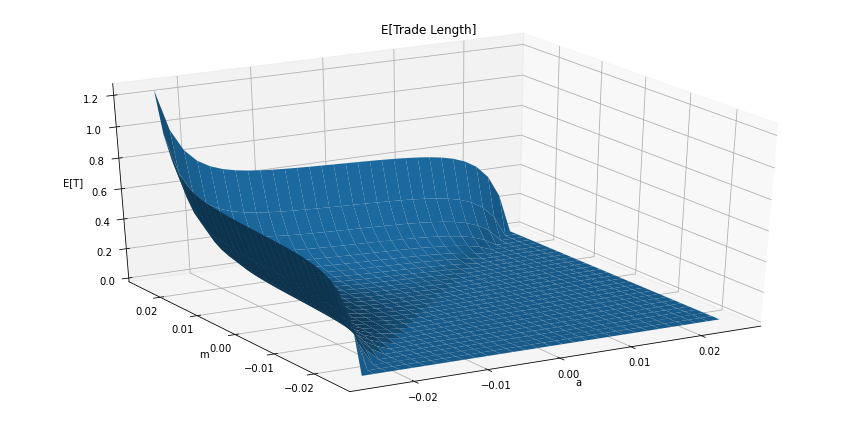

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

func = np.vectorize(OUOTB.expected_trade_length)
expected_trade_length = np.array(func(np.ravel(X), np.ravel(Y)))
Z = expected_trade_length.reshape(X.shape)
Z[skip_points] = 0

ax.plot_surface(X, Y, Z)
ax.view_init(30, 240)

ax.set_title('E[Trade Length]')
ax.set_xlabel('a')
ax.set_ylabel('m')
ax.set_zlabel('E[T]')

plt.tight_layout()
plt.show()

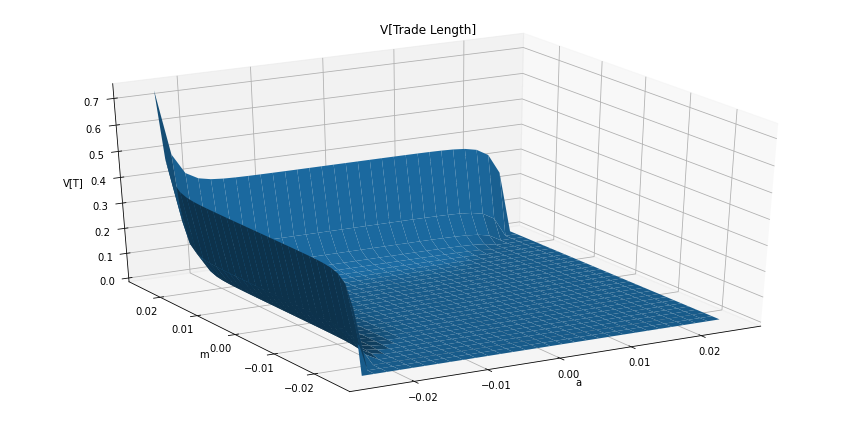

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

func = np.vectorize(OUOTB.trade_length_variance)
trade_length_variance = np.array(func(np.ravel(X), np.ravel(Y)))
Z = trade_length_variance.reshape(X.shape)
Z[skip_points] = 0

ax.plot_surface(X, Y, Z)
ax.view_init(30, 240)

ax.set_title('V[Trade Length]')
ax.set_xlabel('a')
ax.set_ylabel('m')
ax.set_zlabel('V[T]')

plt.tight_layout()
plt.show()

### Fig. 2. The expected return and the variance of the return as a function of trade entry and exit level in the positive half place.

In [9]:
a_list = np.linspace(-0.025, 0.025, 30)
m_list = np.linspace(-0.025, 0.025, 30)

X, Y = np.meshgrid(a_list, m_list)
C = np.array([0.001]*np.ravel(X).shape[0]) # Transaction costs
skip_points = X > Y # Skipping the points if a > m

c:\users\illya\projects\arbitragelab\arbitragelab\time_series_approach\ou_optimal_threshold_bertram.py:73: RuntimeWarning: divide by zero encountered in double_scalars
  return (m - a - c) / self.expected_trade_length(a, m)
C:\Users\illya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2197: RuntimeWarning: divide by zero encountered in expected_return (vectorized)
  outputs = ufunc(*inputs)


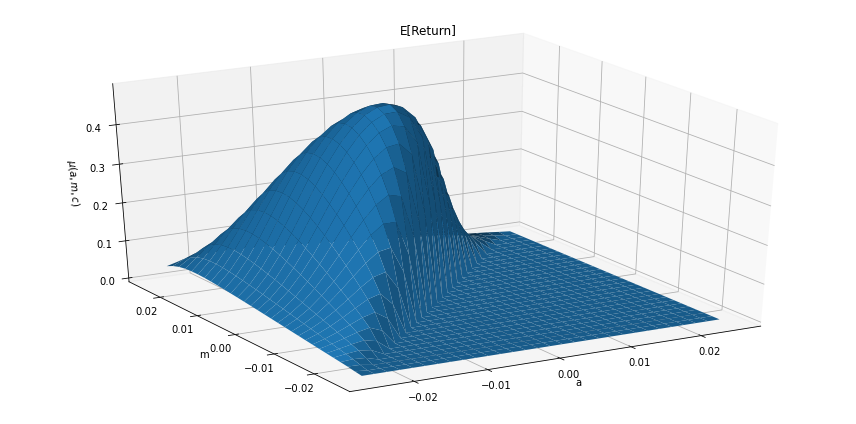

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

func = np.vectorize(OUOTB.expected_return)
expected_return = np.array(func(np.ravel(X), np.ravel(Y), C))
negative_points = expected_return < 0 # Positive half place
expected_return[negative_points] = 0 
nan_points = np.isnan(expected_return) # Removing NaN
expected_return[nan_points] = 0

Z = expected_return.reshape(X.shape)
Z[skip_points] = 0

ax.plot_surface(X, Y, Z)
ax.view_init(30, 240)

ax.set_title('E[Return]')
ax.set_xlabel('a')
ax.set_ylabel('m')
ax.set_zlabel(r'$\mu (a, m, c)$')

plt.tight_layout()
plt.show()

c:\users\illya\projects\arbitragelab\arbitragelab\time_series_approach\ou_optimal_threshold_bertram.py:85: RuntimeWarning: invalid value encountered in double_scalars
  return (m - a - c) ** 2 * self.trade_length_variance(a, m) / (self.expected_trade_length(a, m) ** 3)
C:\Users\illya\anaconda3\lib\site-packages\numpy\lib\function_base.py:2197: RuntimeWarning: invalid value encountered in return_variance (vectorized)
  outputs = ufunc(*inputs)


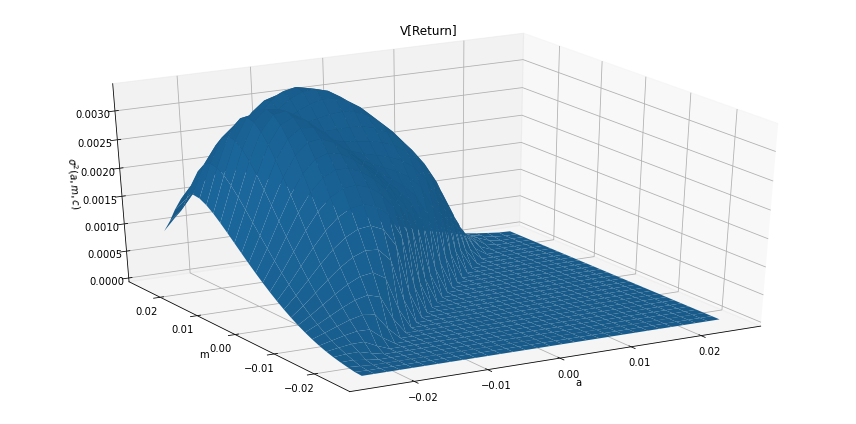

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

func = np.vectorize(OUOTB.return_variance)
return_variance = np.array(func(np.ravel(X), np.ravel(Y), C))
negative_points = return_variance < 0 # Positive half place
return_variance[negative_points] = 0 
nan_points = np.isnan(return_variance) # Removing NaN
return_variance[nan_points] = 0

Z = return_variance.reshape(X.shape)
Z[skip_points] = 0

ax.plot_surface(X, Y, Z)
ax.view_init(30, 240)

ax.set_title('V[Return]')
ax.set_xlabel('a')
ax.set_ylabel('m')
ax.set_zlabel(r'${\sigma}^2 (a, m, c)$')

plt.tight_layout()
plt.show()

### Fig. 3. The Sharpe ratio as a function of trade entry and exit level in the positive half place.

In [12]:
a_list = np.linspace(-0.025, 0.025, 30)
m_list = np.linspace(-0.025, 0.025, 30)

X, Y = np.meshgrid(a_list, m_list)
C = np.array([0.001]*np.ravel(X).shape[0]) # Transaction costs
R = np.array([0.01]*np.ravel(X).shape[0]) # Risk free rates
skip_points = X > Y # Skipping the points if a > m

c:\users\illya\projects\arbitragelab\arbitragelab\time_series_approach\ou_optimal_threshold_bertram.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  r = rf / self.expected_trade_length(a, m)


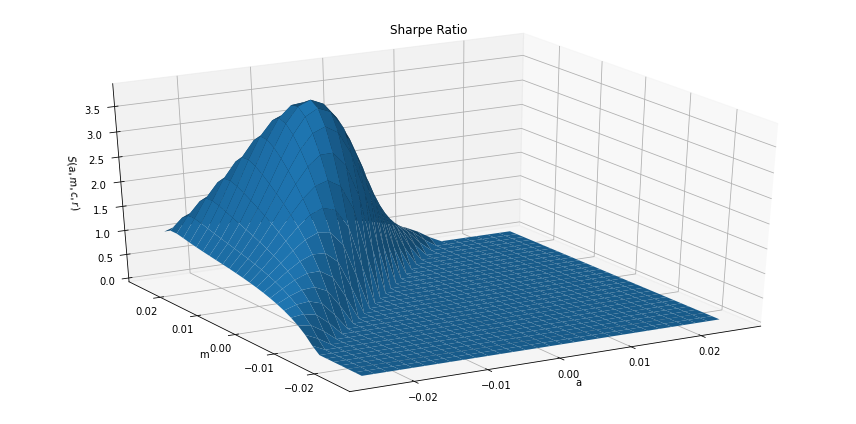

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

func = np.vectorize(OUOTB.sharpe_ratio)
sharpe_ratio = np.array(func(np.ravel(X), np.ravel(Y), C, R))
negative_points = sharpe_ratio < 0 # Positive half place
sharpe_ratio[negative_points] = 0 
nan_points = np.isnan(sharpe_ratio) # Removing NaN
sharpe_ratio[nan_points] = 0

Z = sharpe_ratio.reshape(X.shape)
Z[skip_points] = 0

ax.plot_surface(X, Y, Z)
ax.view_init(30, 240)

ax.set_title('Sharpe Ratio')
ax.set_xlabel('a')
ax.set_ylabel('m')
ax.set_zlabel(r'$S(a, m, c, r)$')

plt.tight_layout()
plt.show()

### Fig. 4. The optimal trading bands and corresponding maximum return of the strategy as a function of transaction cost.

In [14]:
c_list = np.linspace(0, 0.01, 30)

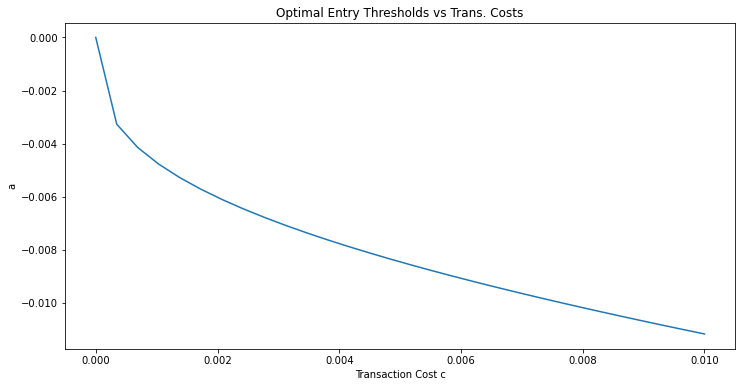

In [15]:
fig = OUOTB.plot_target_vs_c(target = "a", method = "maximize_expected_return", c_list = c_list)
plt.show()

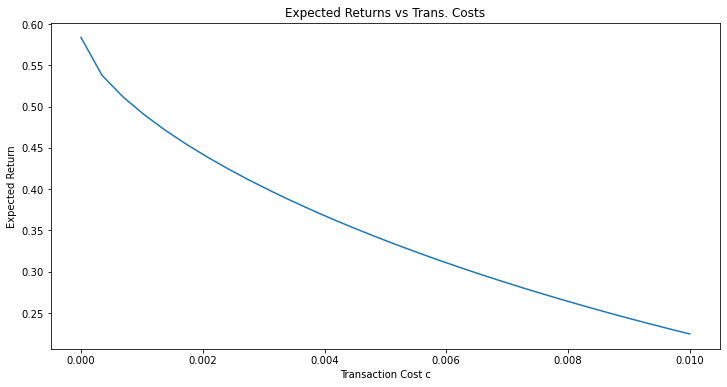

In [16]:
fig = OUOTB.plot_target_vs_c(target = "expected_return", method = "maximize_expected_return", c_list = c_list)
plt.show()

### Fig. 5. The optimal trading bands and corresponding maximum return of the strategy as a function of the risk-free rate $r_f$.

In [17]:
c = 0.001
rf_list = np.linspace(0, 0.05, 30)

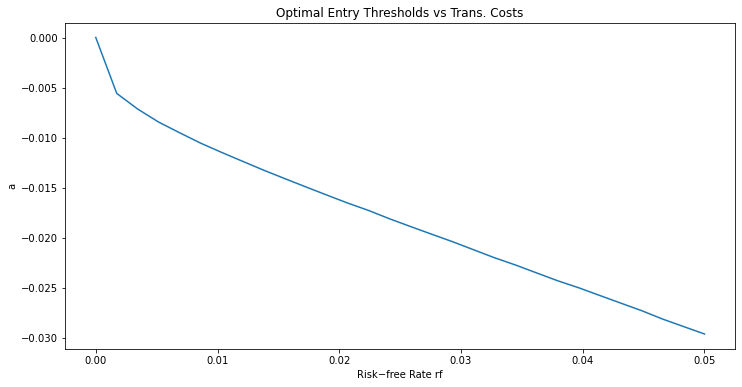

In [18]:
fig = OUOTB.plot_target_vs_rf(target = "a", method = "maximize_sharpe_ratio", rf_list = rf_list, c = c)
plt.show()

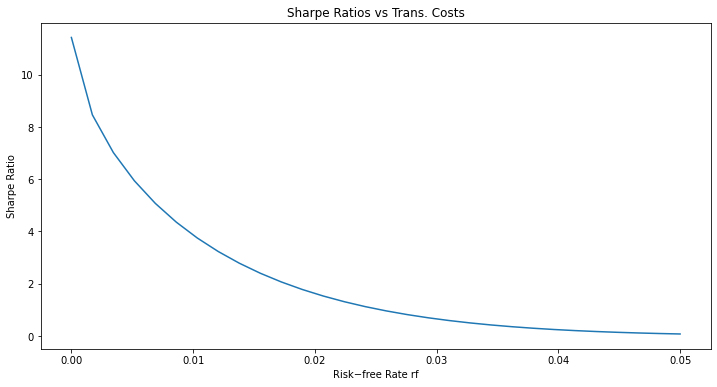

In [19]:
fig = OUOTB.plot_target_vs_rf(target = "sharpe_ratio", method = "maximize_sharpe_ratio", rf_list = rf_list, c = c)
plt.show()

### Table 1 
### Results for maximising the expected return with α = 180.9670, η = 0.1538.

In [20]:
c_list = np.array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.015, 0.0175, 0.02])
func = np.vectorize(OUOTB.get_threshold_by_maximize_expected_return)
a_list, m_list = func(c_list)

func = np.vectorize(OUOTB.expected_return)
expected_return_list = func(a_list, m_list, c_list)

In [21]:
table_1 = pd.DataFrame([c_list, a_list, expected_return_list]).T
table_1.columns = ["c", "a", "Expected Return"]
display(table_1)

,c,a,Expected Return
0,0.0010,-0.004715,0.492358
1,0.0020,-0.006023,0.442194
2,0.0030,-0.006978,0.402138
3,0.0040,-0.007765,0.367968
4,0.0050,-0.008452,0.337897
5,0.0060,-0.009072,0.310952
6,0.0150,-0.013372,0.148597
7,0.0175,-0.014394,0.119610
8,0.0200,-0.015388,0.095360


### Table 2
### Results for maximising the Sharpe ratio with α = 180.9670, η = 0.1538, c = 0.001.

In [22]:
rf_list = np.array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.015, 0.0175, 0.02])
c_list = np.array([0.001] * len(rf_list))
func = np.vectorize(OUOTB.get_threshold_by_maximize_sharpe_ratio)
a_list, m_list = func(c_list, rf_list)

func = np.vectorize(OUOTB.expected_return)
expected_return_list = func(a_list, m_list, c_list)

func = np.vectorize(OUOTB.return_variance)
variance_list = func(a_list, m_list, c_list)

func = np.vectorize(OUOTB.sharpe_ratio)
sharpe_ratio_list = func(a_list, m_list, c_list, rf_list)

In [23]:
table_2 = pd.DataFrame([rf_list, a_list, sharpe_ratio_list, expected_return_list, variance_list]).T
table_2.columns = ["rf", "a", "Sharpe Ratio", "Expected Return", "Variance"]
display(table_2)

,rf,a,Sharpe Ratio,Expected Return,Variance
0,0.0010,4.577637e-09,22.852450,63750.523707,3.112849e+07
1,0.0020,-5.850000e-03,8.195743,0.487644,2.340450e-03
2,0.0030,-6.825000e-03,7.350717,0.477546,2.456097e-03
3,0.0040,-7.593750e-03,6.645965,0.466497,2.540419e-03
4,0.0050,-8.300000e-03,6.038166,0.454298,2.613567e-03
5,0.0060,-8.978125e-03,5.503749,0.440945,2.679886e-03
6,0.0150,-1.381250e-02,2.511186,0.312356,2.949510e-03
7,0.0175,-1.496250e-02,2.022816,0.276771,2.920755e-03
8,0.0200,-1.617812e-02,1.625695,0.238913,2.832858e-03


---

## Conclusion

This notebook demonstrated an implementation of the methods for finding optimal trading thresholds under several assumptions and two different objective functions. The numerical results are consistent with the results in the paper, confirming that the implementation seems to be correct.

Key takeaways from the notebook:
- Analytic way to calculate the expected trade length for the series follows O-U process.
- A way to reduce optimal trading thresholds finding problem to a simple maximization problem.

## References

1. [Bertram, W. K., Analytic solutions for optimal statistical arbitrage trading. Physica A: Statistical Mechanics and its Applications, 389(11): 2234–2243.](http://www.stagirit.org/sites/default/files/articles/a_0340_ssrn-id1505073.pdf)